# 03-corr.ipynb  
## Análise de Correlações e Testes Estatísticos  
**Objetivo**: explorar relações entre variáveis numéricas (preço, valor total, tempo de entrega, nota) e fazer um teste ANOVA simples para comparar ticket médio entre categorias.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [3]:
# Carregar dados limpos
df = pd.read_csv("../data/ecommerce_clean.csv", parse_dates=[
    "order_purchase_timestamp",
    "order_delivered_customer_date",
    "review_creation_date"
])


In [4]:
# Carregar dados limpos
df = pd.read_csv("../data/ecommerce_clean.csv", parse_dates=[
    "order_purchase_timestamp",
    "order_delivered_customer_date",
    "review_creation_date"
])


## 1. Matriz de Correlação  
Selecionamos as variáveis numéricas de interesse para calcular correlações de Pearson.


In [5]:
# Seleção de colunas numéricas
cols = ["price", "total_price", "delivery_time", "review_score"]
corr = df[cols].corr()

print("Matriz de correlação:")
display(corr)

Matriz de correlação:


,price,total_price,delivery_time,review_score
price,1.000000,1.000000,0.062222,0.003259
total_price,1.000000,1.000000,0.062222,0.003259
delivery_time,0.062222,0.062222,1.000000,-0.304058
review_score,0.003259,0.003259,-0.304058,1.000000


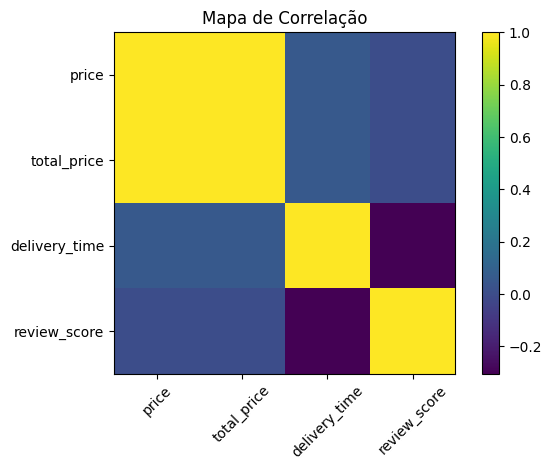

In [6]:
# Plot da matriz
plt.figure()
plt.imshow(corr.values)
plt.xticks(range(len(cols)), cols, rotation=45)
plt.yticks(range(len(cols)), cols)
plt.colorbar()
plt.title("Mapa de Correlação")
plt.tight_layout()

## 2. Teste ANOVA: ticket médio por categoria  
Queremos ver se o ticket médio difere significativamente entre as 5 categorias com maior número de pedidos.

## Instalação do SciPy  
Para realizar testes estatísticos, precisamos do SciPy. Execute o bloco a seguir para instalar.


In [7]:
!pip install scipy

In [8]:
from scipy.stats import f_oneway

# Ticket médio por pedido
df["ticket_medio"] = df["total_price"]

# Selecionar top 5 categorias por número de pedidos
top5 = df["product_category_name"].value_counts().head(5).index.tolist()

# Agrupar ticket médio por categoria
groups = [df.loc[df["product_category_name"] == cat, "ticket_medio"] for cat in top5]

# ANOVA
f_stat, p_val = f_oneway(*groups)
print(f"ANOVA F={f_stat:.2f}, p-valor={p_val:.4f}")

print("\nCategorias testadas:", top5)

ANOVA F=143.90, p-valor=0.0000

Categorias testadas: ['cama_mesa_banho', 'beleza_saude', 'esporte_lazer', 'moveis_decoracao', 'informatica_acessorios']
